In [7]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [30]:
def parser(x):
    return datetime.strptime(x,'%Y-%m') #format int dataset is year-month

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [31]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


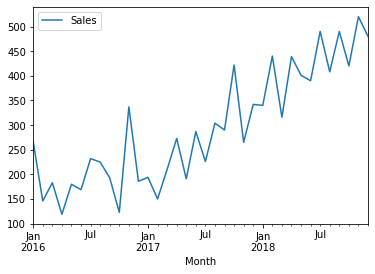

In [32]:
sales.plot()

In [33]:
#It is not a stationary graph - meaning : mean,variance and covariance is constant over periods but here it is not 
#So we have to convert it into stationary
#STEP 1 : Take diff of values  [146-266]
sales_diff=sales.diff(periods=1) #integrated of order 1 ,denoted by d for diff...one of the parameteres of ARIMA model
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [34]:
#To ignore the nAn
sales_diff=sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


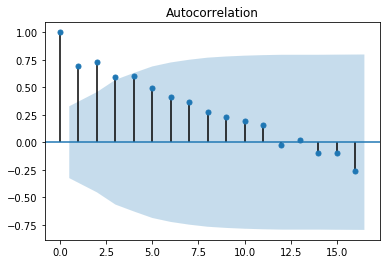

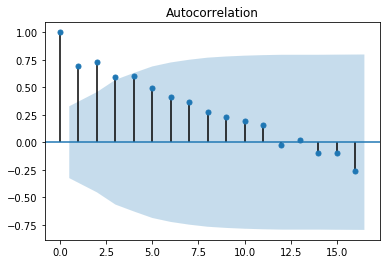

In [35]:
#Another way to check if its stationary - acf plots - auto correlation between sales & sales.shift(1)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)
#NOT STATIONARY

In [15]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [16]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


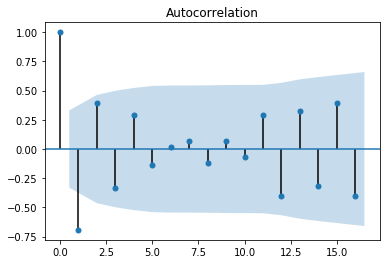

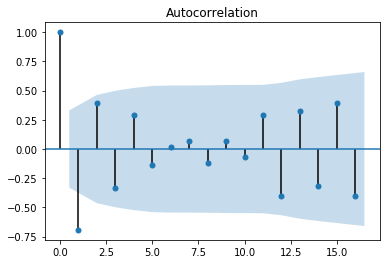

In [36]:
plot_acf(sales_diff)
#STATIONARY - Converted

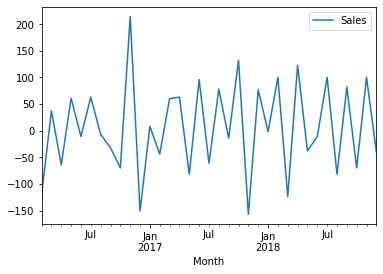

In [37]:
sales_diff.plot()

In [38]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [39]:
train.size

27

In [41]:
#Simple Auto Regressive AR Model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [42]:
predictions = model_ar_fit.predict(start=26,end=36)

In [43]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

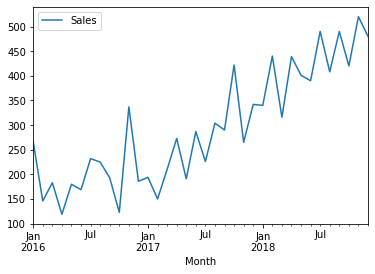

In [44]:
sales.plot()

In [46]:
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [58]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model

model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic) #like mean squared error should be mean

297.16198408812727


In [57]:
#similar to AR instead of predict we u se forcase
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([409.95347473, 358.17752547, 449.31427275, 436.3465148 ,
       466.33328966, 459.17948177, 490.3143329 , 526.93033936,
       543.88934217, 565.51014311])

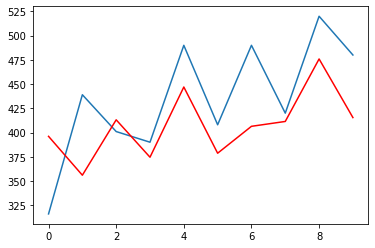

In [49]:
plt.plot(test)
plt.plot(predictions,color='red')

In [50]:
mean_squared_error(test,predictions)

2958.153543147542

In [51]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [52]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.40758681554314
(4, 0, 0) 311.0706562039329
(4, 0, 1) 321.8309391983909
(4, 1, 0) 295.93436313519135
(4, 1, 1) 297.9098817